In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import math
import itertools
from sklearn. linear_model import LinearRegression



In [22]:
data = pd.read_excel(r"C:\Users\ADMIN\Documents\2nd yr\Macro\CA 1 Data set.xlsx")

In [23]:
data.head()

,Year,ST,EI,IH,GDP ($Mn),BI ($Mn)
0,1983,0.335,0.623,2.06,167.50,40.70
1,1984,0.330,0.616,2.10,298.40,78.65
2,1985,0.335,0.647,2.17,102.33,32.12
3,1986,0.330,0.652,2.21,124.24,38.14
4,1987,0.334,0.680,2.23,146.15,56.14


In [24]:
data['Year'].duplicated().sum()

0

In [25]:
data.isnull().sum()

Year         0
ST           0
EI           0
IH           0
GDP ($Mn)    0
BI ($Mn)     0
dtype: int64

In [26]:
numerical_variables = ['ST', 'EI', 'GDP ($Mn)','IH', 'BI ($Mn)']
data[numerical_variables].describe()



,ST,EI,GDP ($Mn),IH,BI ($Mn)
count,41.000000,41.000000,41.000000,41.000000,41.000000
mean,0.341317,0.905317,206.748293,2.631463,54.330512
std,0.017647,0.201472,76.969493,0.329815,15.125019
min,0.312000,0.616000,102.330000,2.060000,32.120000
25%,0.330000,0.729000,148.910000,2.470000,40.890000
50%,0.337000,0.874000,192.340000,2.630000,56.261000
75%,0.354000,1.034000,232.000000,2.810000,64.075000
max,0.397000,1.296000,498.180000,3.330000,95.445000


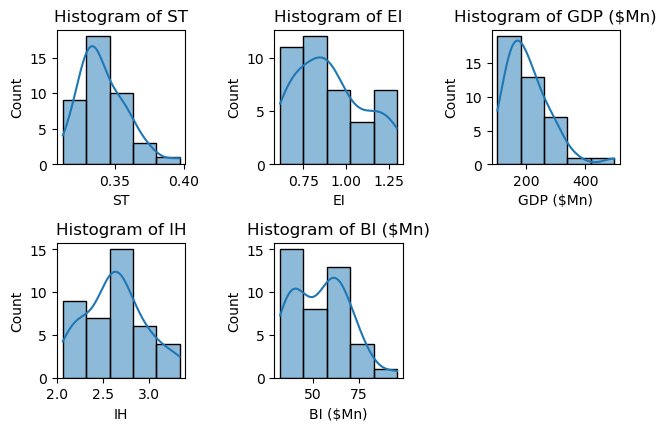

In [27]:
numerical_variables = ['ST', 'EI', 'GDP ($Mn)','IH', 'BI ($Mn)']

for i, var in enumerate(numerical_variables):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[var], bins=5, kde=True)
    plt.title(f'Histogram of {var}')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

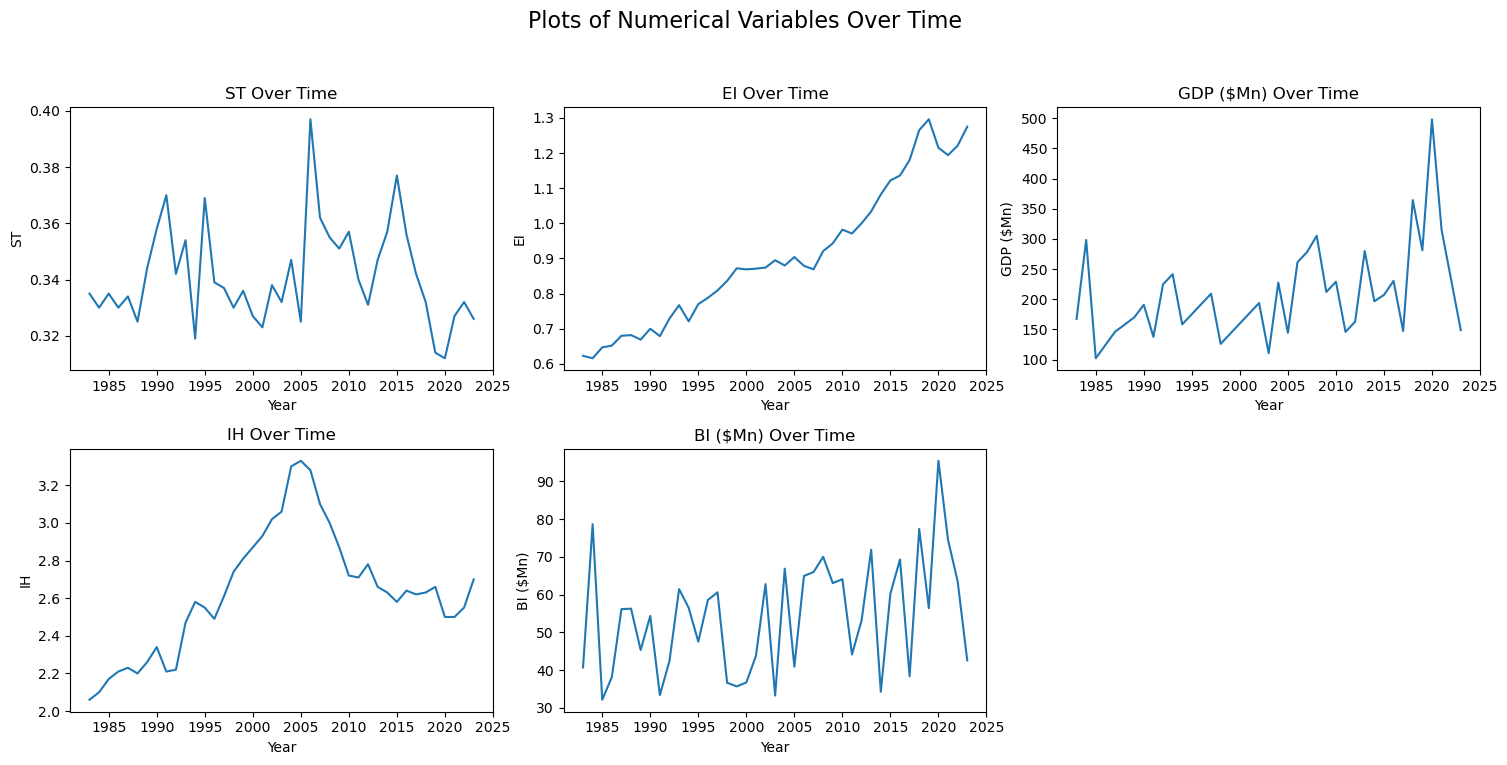

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Plots of Numerical Variables Over Time', fontsize=16)

for i in range(len(numerical_variables)):
    var = numerical_variables[i]
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    sns.lineplot(x='Year', y=var, data=data, ax=ax)
    ax.set_title(f'{var} Over Time')
    ax.set_xlabel('Year')
    ax.set_ylabel(var)


if len(numerical_variables) < 6:
    for i in range(len(numerical_variables), 6):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

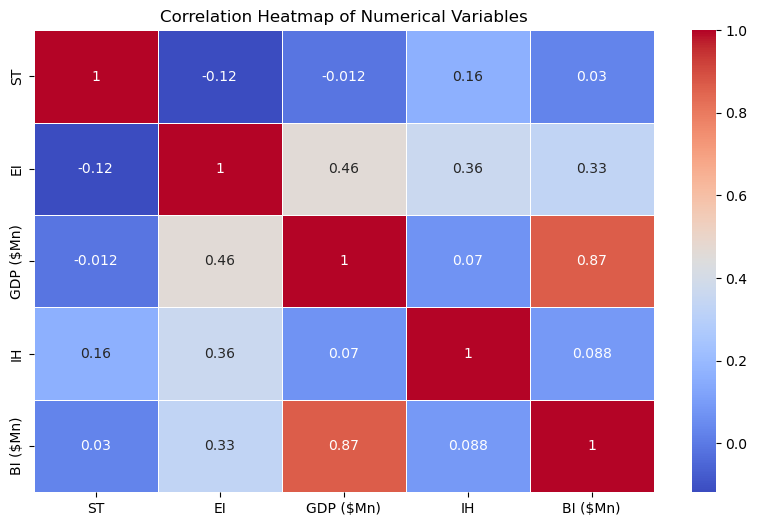

In [29]:
numerical_variables_df = data[numerical_variables]

correlation_matrix = numerical_variables_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

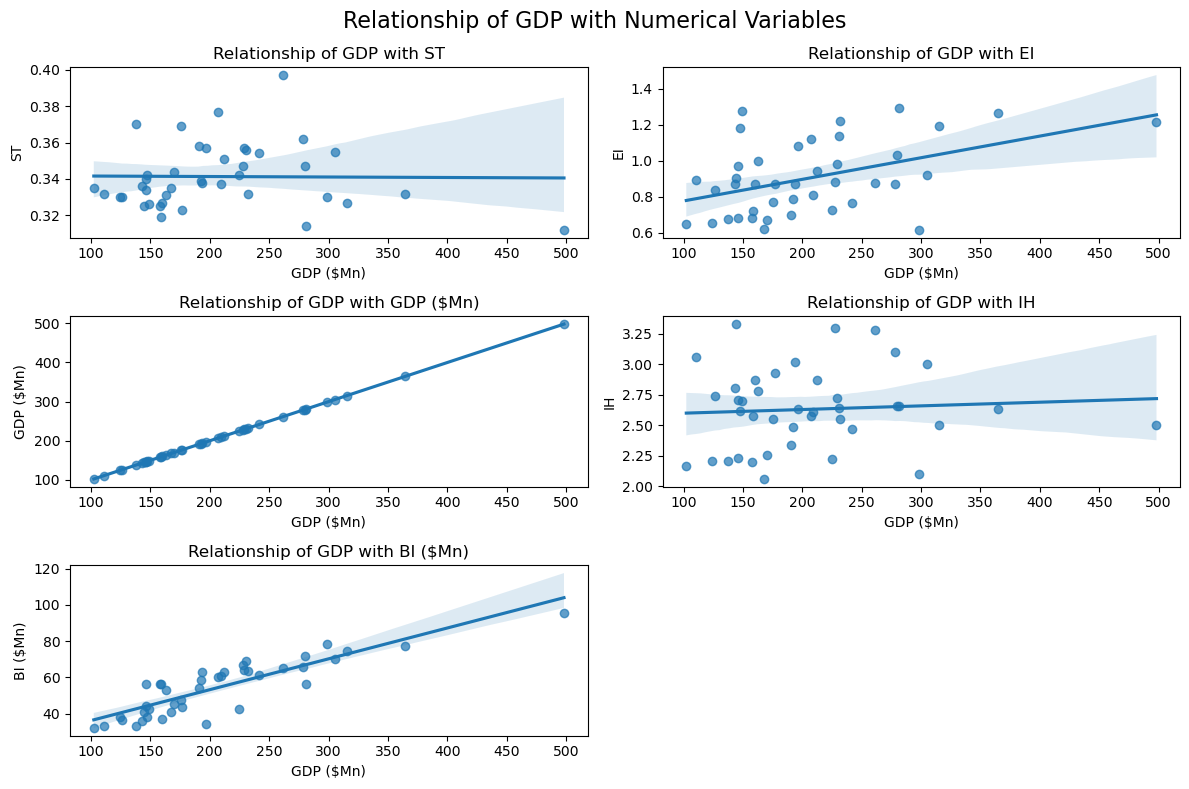

In [30]:
num_vars = len(numerical_variables)
rows = math.ceil(num_vars / 2)
cols = 2

plt.figure(figsize=(12, 8))
plt.suptitle('Relationship of GDP with Numerical Variables', fontsize=16)

for i, var in enumerate(numerical_variables):
    plt.subplot(rows, cols, i + 1)
    sns.regplot(x='GDP ($Mn)', y=var, data=data, scatter_kws={'alpha': 0.7})
    plt.title(f'Relationship of GDP with {var}')
    plt.xlabel('GDP ($Mn)')
    plt.ylabel(var)


plt.tight_layout()
plt.show()

In [31]:
X = data['BI ($Mn)']  
y = data['GDP ($Mn)']  

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              GDP ($Mn)   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     118.9
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           2.08e-13
Time:                        20:12:25   Log-Likelihood:                -207.08
No. Observations:                  41   AIC:                             418.2
Df Residuals:                      39   BIC:                             421.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.1740     22.819     -1.454      0.1

In [32]:
X = data['EI']  
y = data['GDP ($Mn)']  

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              GDP ($Mn)   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     10.40
Date:                Sun, 10 Sep 2023   Prob (F-statistic):            0.00255
Time:                        20:12:25   Log-Likelihood:                -230.90
No. Observations:                  41   AIC:                             465.8
Df Residuals:                      39   BIC:                             469.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.0452     50.382      0.954      0.3

In [33]:
X = data['ST']  
y = data['GDP ($Mn)']  

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              GDP ($Mn)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                  0.005239
Date:                Sun, 10 Sep 2023   Prob (F-statistic):              0.943
Time:                        20:12:25   Log-Likelihood:                -235.75
No. Observations:                  41   AIC:                             475.5
Df Residuals:                      39   BIC:                             478.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        224.0008    238.675      0.939      0.3

In [34]:
#in above since the R-squared is 0.000 ive not talked about it in the report.

In [44]:
df2 = data[['GDP ($Mn)', 'BI ($Mn)', 'EI']]
X = df2.drop('GDP ($Mn)', axis=1)  
y = df2['GDP ($Mn)']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

future_years = [2024, 2025, 2026, 2027, 2028]

model = LinearRegression ()
model. fit (X_train, y_train)

future_data = pd.DataFrame(X_test)

future_predictions = model.predict(future_data)

for year, prediction in zip(future_years, future_predictions):
    print(f"Year {year}: Predicted GDP Growth = {prediction: .2f}")

Year 2024: Predicted GDP Growth =  255.10
Year 2025: Predicted GDP Growth =  217.74
Year 2026: Predicted GDP Growth =  105.90
Year 2027: Predicted GDP Growth =  276.18
Year 2028: Predicted GDP Growth =  198.12


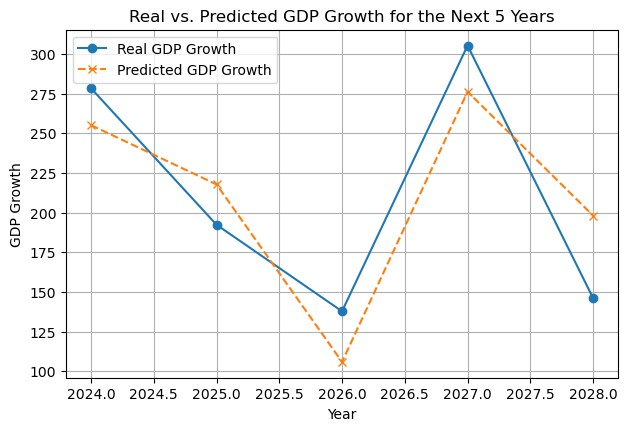

In [43]:
future_years = [2024, 2025, 2026, 2027, 2028]

real_growth = y_test.values[:len(future_years)]  
future_predictions = future_predictions[:len(future_years)]

plt.plot(future_years, real_growth, label='Real GDP Growth', marker='o', linestyle='-')
plt.plot(future_years, future_predictions, label='Predicted GDP Growth', marker='x', linestyle='--')

plt.title('Real vs. Predicted GDP Growth for the Next 5 Years')
plt.xlabel('Year')
plt.ylabel('GDP Growth')
plt.legend()
plt.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
